In [385]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [387]:
sns.set_theme(); 

## Datasets
I looked across several differnet kinds of "top movie" standards

### [Best Picture](https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year%2Cdesc&ref_=nv_ch_osc) - Oscar Winner Per Year

In [461]:
df = pd.read_csv("data/ratings_best_picture_oscar_winners.csv")
df.drop(inplace=True, columns='Unnamed: 0')

In [464]:
df = df[df.rating.notna()]

In [468]:
df.loc[:,"rating_str"] = df.rating.map(lambda r: str(r))

In [465]:
df

,titles,years,imdb_ids,rating
0,Parasite,2019,6751668,3.0
1,Green Book,2018,6966692,1.0
2,The Shape of Water,2017,5580390,3.0
3,Moonlight,2016,4975722,1.0
4,Spotlight,2015,1895587,1.0
...,...,...,...,...
88,Cimarron,1931,21746,3.0
89,All Quiet on the Western Front,1930,20629,0.0
90,The Broadway Melody,1929,19729,3.0
91,Wings,1927,18578,1.0


<AxesSubplot:xlabel='years', ylabel='rating_str'>

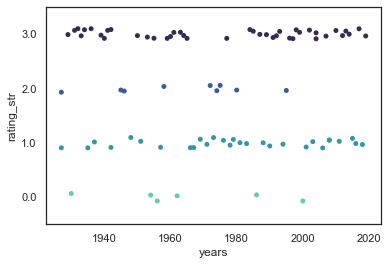

In [472]:
sns.stripplot(
    data=df, x="years", y="rating_str", order=["3.0", "2.0", "1.0", "0.0"], palette="mako"
)

### [Best Picture](https://www.widescreenings.com/list-best-picture-oscar.html) - Oscar Nominees Per Year

In [366]:
df = pd.read_csv("data/ratings_best_picture_oscar_nominees.csv")
df.drop(inplace=True, columns="Unnamed: 0")

In [367]:
df = df[df.rating.notna()]
df.loc[:, 'year'] = df.year.astype(int);
df.loc[:, 'pass'] = df['rating'] == 3.0;

In [368]:
len(df)

377

In [369]:
df

,year,title,rating,pass
0,2019,The Irishman,1.0,False
1,2019,1917,0.0,False
2,2019,Joker,3.0,True
3,2019,Once Upon a Time... in Hollywood,3.0,True
4,2019,Ford v Ferrari,0.0,False
...,...,...,...,...
523,1934,Imitation of Life,3.0,True
531,1934,It Happened One Night,3.0,True
534,1932,I Am a Fugitive from a Chain Gang,1.0,False
547,1931,The Champ,1.0,False


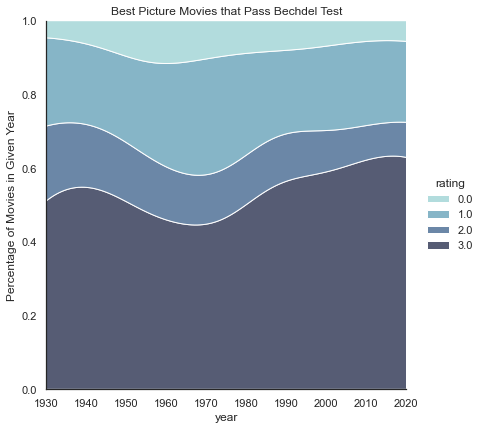

In [383]:
ax = sns.displot(
    data=df,
    x="year", hue="rating",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')
_ = plt.xlim(min(df['year'])-1, max(df['year'])+1)

(1930.0, 2020.0)

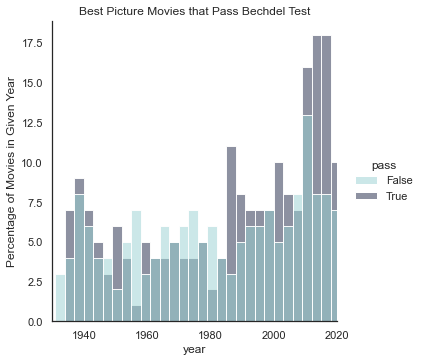

In [403]:
ax = sns.displot(
    data=df,
    x="year", hue="pass", binwidth=3,
    palette="ch:rot=-.25,hue=1,light=.75",
)

_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')


plt.xlim(min(df['year'])-1, max(df['year'])+1)

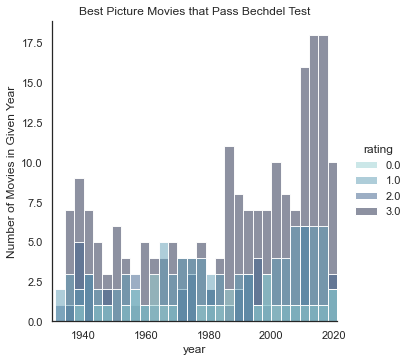

In [411]:
ax = sns.displot(
    data=df,
    x="year", hue="rating", binwidth=3,
    palette="ch:rot=-.25,hue=1,light=.75",
)

_ = plt.ylabel('Number of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')


_ = plt.xlim(min(df['year'])-1, max(df['year'])+2)

plt.show()


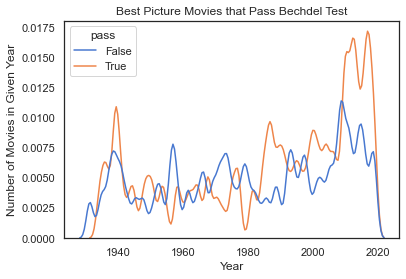

In [420]:
sns.kdeplot(data=df, x="year", hue="pass", bw_adjust=.1)

_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')

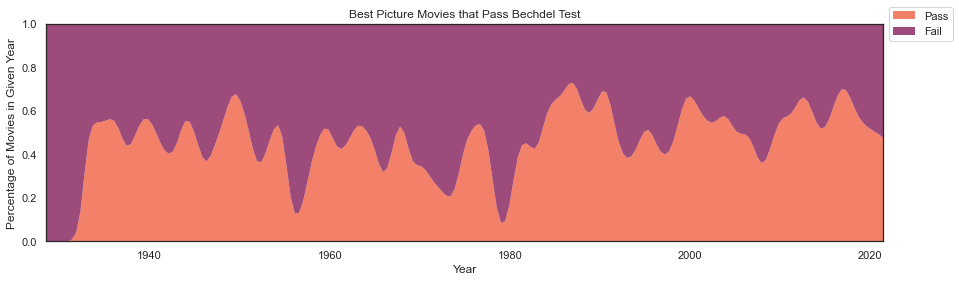

In [457]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

g = sns.kdeplot(ax=ax, data=df, x="year", hue="pass", 
            common_norm=False, palette="rocket",
            alpha=.8, linewidth=0,
            bw_adjust=.1, multiple="fill")

_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')

_ = ax.legend(["Pass", "Fail"], bbox_to_anchor=(1,1), ncol=1, loc='center left')


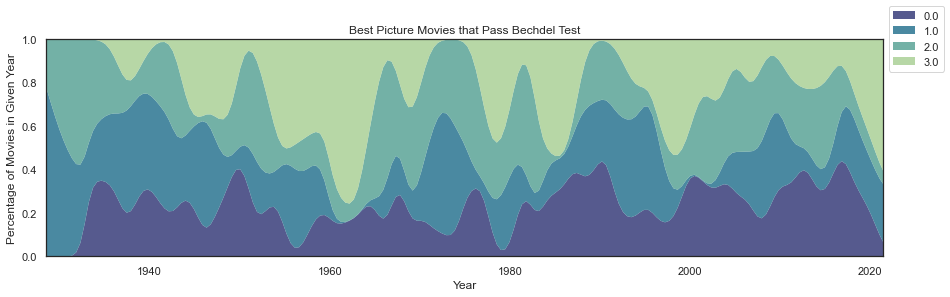

In [452]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

g = sns.kdeplot(ax=ax, data=df, x="year", hue="rating", 
            common_norm=False, palette="crest",
            alpha=.8, linewidth=0,
            bw_adjust=.1, multiple="fill")

_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Best Picture Movies that Pass Bechdel Test')

_ = ax.legend(["0.0", "1.0", "2.0", "3.0"], bbox_to_anchor=(1,1), ncol=1, loc='center left')


In [438]:
decades = []
for each in df.year:
    decade = int(np.floor(each / 10) * 10)
    decades.append(decade)
    
df.loc[:,'decades'] = decades

In [431]:
# Group every 10 years together

passes = df.groupby("decades").sum()['pass'].values
totals = df.groupby("decades").count()['pass'].values
failures = totals - passes     


fail_percentage = failures/totals * 100
pass_percentage = passes/totals * 100

xaxis_years = df.groupby("decades")["decades"].count().index.values

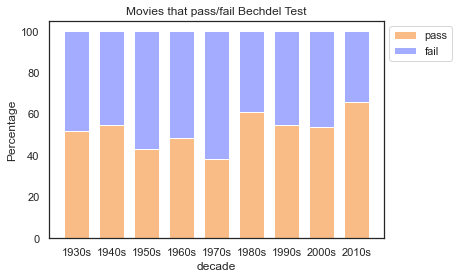

In [432]:
barWidth = 7
_ = plt.bar(xaxis_years, pass_percentage, color='#f9bc86', edgecolor='white', width=barWidth)
_ = plt.bar(xaxis_years, fail_percentage, bottom = pass_percentage, color='#a3acff', edgecolor='white', width=barWidth)
_ = plt.xticks(xaxis_years, [str(a)+"s" for a in xaxis_years])

_ = plt.legend(["pass", "fail"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)

_ = plt.xlabel("decade")
_ = plt.ylabel("Percentage")
_ = plt.title("Movies that pass/fail Bechdel Test")


In [433]:
five_years = []
for each in df.year:
    five = int(np.floor(each / 5) * 5)
    five_years.append(five)
    
df.loc[:,'five_years'] = five_years

In [434]:
# Group every 5 years together

passes = df.groupby("five_years").sum()['pass'].values
totals = df.groupby("five_years").count()['pass'].values
failures = totals - passes     


fail_percentage = failures/totals * 100
pass_percentage = passes/totals * 100

xaxis_years = df.groupby("five_years")["five_years"].count().index.values

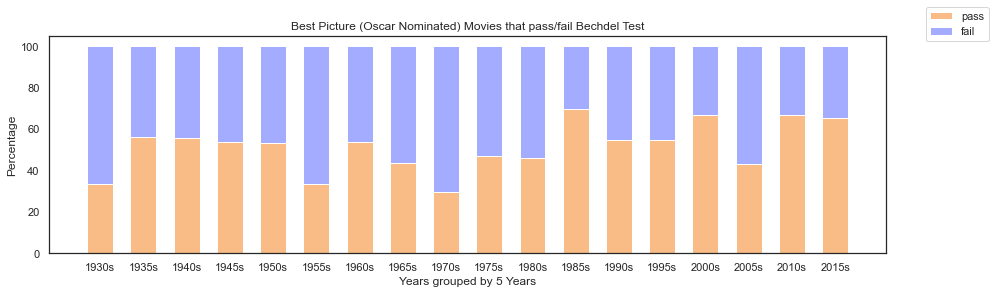

In [435]:
barWidth = 3

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

_ = ax.bar(xaxis_years, pass_percentage, color='#f9bc86', edgecolor='white', width=barWidth)
_ = ax.bar(xaxis_years, fail_percentage, bottom = pass_percentage, color='#a3acff', edgecolor='white', width=barWidth)

# Setting x-axis ticks
_ = ax.set_xticks(ticks=xaxis_years)
_ = ax.set_xticklabels([str(a)+"s" for a in xaxis_years])

# Legend
_ = fig.legend(["pass", "fail"], bbox_to_anchor=(1,1), ncol=1)

_ = ax.set_xlabel("Years grouped by 5 Years")
_ = ax.set_ylabel("Percentage")
_ = ax.set_title("Best Picture (Oscar Nominated) Movies that pass/fail Bechdel Test")


In [436]:
passes = df.groupby("year").sum()['pass'].values
totals = df.groupby("year").count()['pass'].values
failures = totals - passes     


fail_percentage = failures/totals * 100
pass_percentage = passes/totals * 100

xaxis_years = df.groupby("year")["year"].count().index.values

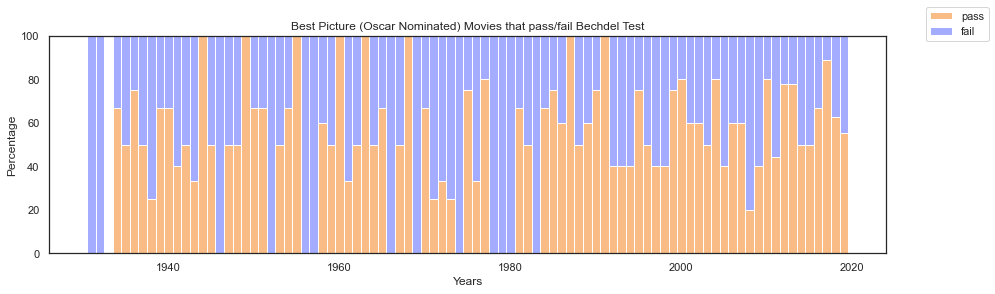

In [437]:
barWidth = 1

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

_ = ax.bar(xaxis_years, pass_percentage, color='#f9bc86', edgecolor='white', width=barWidth)
_ = ax.bar(xaxis_years, fail_percentage, bottom = pass_percentage, color='#a3acff', edgecolor='white', width=barWidth)

# Setting x-axis ticks
# _ = ax.set_xticks(ticks=xaxis_years/5)
# _ = ax.set_xticklabels([str(a)+"s" for a in xaxis_years])

# Legend
_ = fig.legend(["pass", "fail"], bbox_to_anchor=(1,1), ncol=1)

_ = ax.set_xlabel("Years")
_ = ax.set_ylabel("Percentage")
_ = ax.set_title("Best Picture (Oscar Nominated) Movies that pass/fail Bechdel Test")


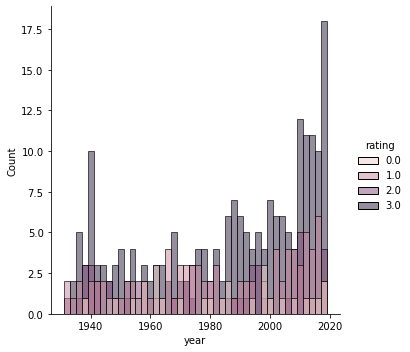

In [304]:
sns.displot(df, x="year", hue="rating", fill=True, binwidth=2
)

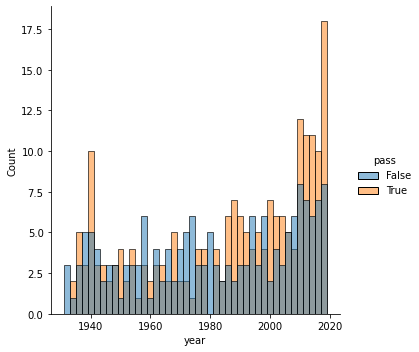

In [305]:
sns.displot(df, x="year", hue="pass", fill=True, binwidth=2
)

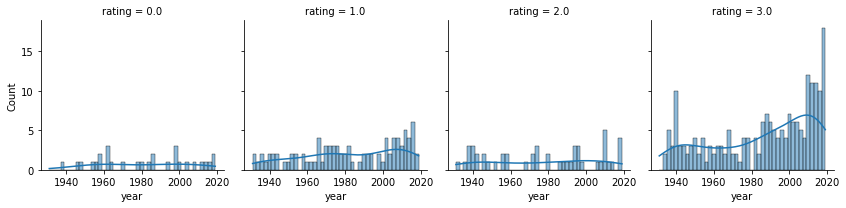

In [293]:
sns.displot(
    df, x="year", col="rating",
    binwidth=2, height=3, facet_kws=dict(margin_titles=True), kde=True
)

### [Kaggle Top 10 Highest Grossing Films](https://www.kaggle.com/bidyutchanda/top-10-highest-grossing-films-19752018#)

In [481]:
df = pd.read_csv("data/ratings_highest_grossing.csv")
df = df[df.rating.notna()]
df.loc[:, 'pass'] = df['rating'] == 3.0;

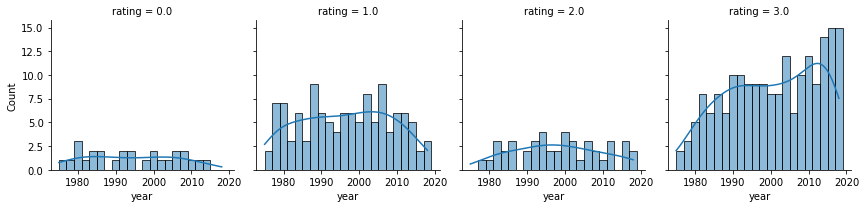

In [321]:
sns.displot(
    df, x="year", col="rating",
    binwidth=2, height=3, facet_kws=dict(margin_titles=True), kde=True
)

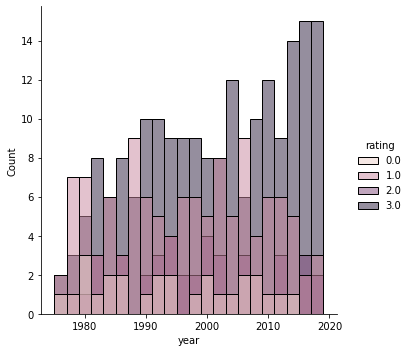

In [322]:
sns.displot(df, x="year", hue="rating", fill=True, binwidth=2
)

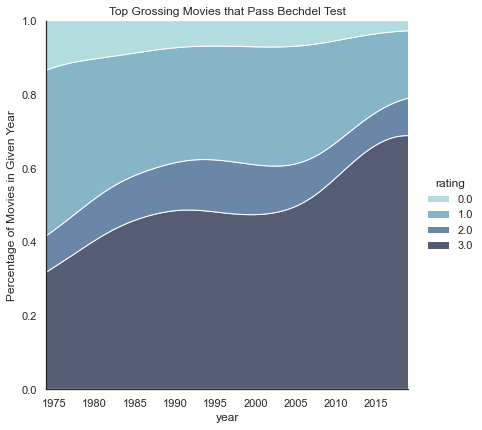

In [477]:
ax = sns.displot(
    data=df,
    x="year", hue="rating",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Top Grossing Movies that Pass Bechdel Test')
_ = plt.xlim(min(df['year'])-1, max(df['year'])+1)

(1974.0, 2019.0)

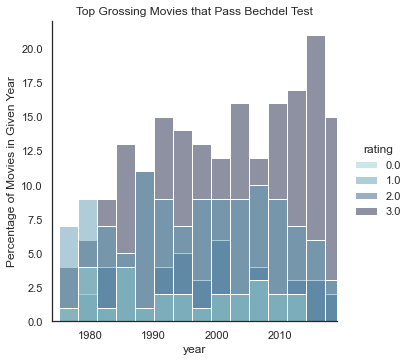

In [330]:
ax = sns.displot(
    data=df,
    x="year", hue="rating", binwidth=3,
    palette="ch:rot=-.25,hue=1,light=.75",
)

_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Top Grossing Movies that Pass Bechdel Test')


plt.xlim(min(df['year'])-1, max(df['year'])+1)

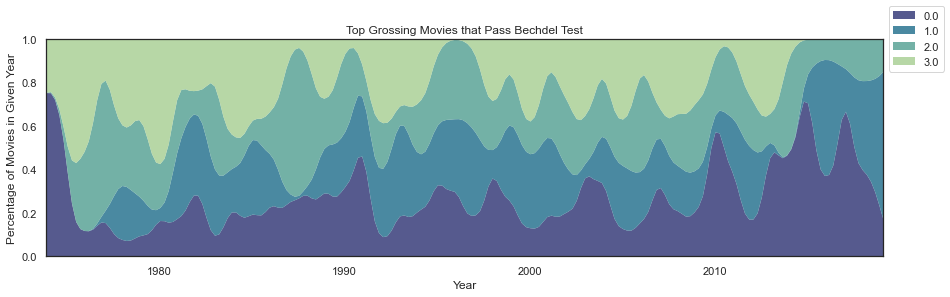

In [478]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

g = sns.kdeplot(ax=ax, data=df, x="year", hue="rating", 
            common_norm=False, palette="crest",
            alpha=.8, linewidth=0,
            bw_adjust=.1, multiple="fill")

_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Top Grossing Movies that Pass Bechdel Test')

_ = ax.legend(["0.0", "1.0", "2.0", "3.0"], bbox_to_anchor=(1,1), ncol=1, loc='center left')

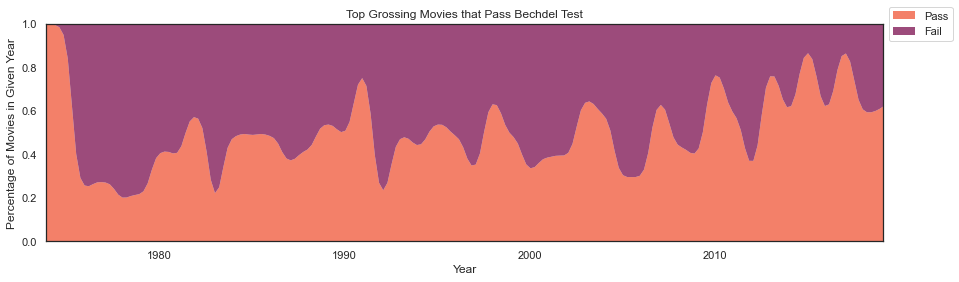

In [482]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

g = sns.kdeplot(ax=ax, data=df, x="year", hue="pass", 
            common_norm=False, palette="rocket",
            alpha=.8, linewidth=0,
            bw_adjust=.1, multiple="fill")

_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage of Movies in Given Year')
_ = plt.title('Top Grossing Movies that Pass Bechdel Test')

_ = ax.legend(["Pass", "Fail"], bbox_to_anchor=(1,1), ncol=1, loc='center left')
